In [1]:
from scipy import misc
ascent_image = misc.ascent()

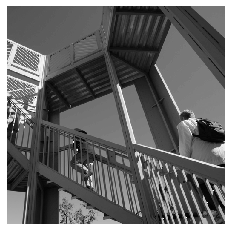

In [2]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [3]:
import numpy as np
image_transformed = np.copy(ascent_image)
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [4]:
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

Convolution

In [5]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution += ascent_image[x-1][y-1]*filter[0][0]
        convolution += ascent_image[x-1][y]*filter[0][1]
        convolution += ascent_image[x-1][y+1]*filter[0][2]
        convolution += ascent_image[x][y-1]*filter[1][0]
        convolution += ascent_image[x][y]*filter[1][1]
        convolution += ascent_image[x][y+1]*filter[1][2]
        convolution += ascent_image[x+1][y-1]*filter[2][0]
        convolution += ascent_image[x+1][y]*filter[2][1]
        convolution += ascent_image[x+1][y+1]*filter[2][2]
        convolution = convolution * weight
        if convolution<0:
            convolution = 0
        if convolution > 255:
            convolution = 255
        image_transformed[x, y] = convolution

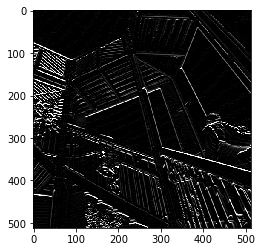

In [6]:
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

Pooling

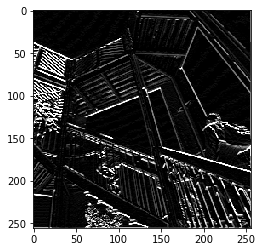

In [7]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Get only the largest value and assign to the reduced image
        newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0